In [2]:
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
json.__version__

'2.0.9'

In [35]:
data = {}
BASE_FILE_NAME = '../data/{0}_non_ia_doc2vec_clustering.json'

for i in range(1,501):
    try:
        data[i] = json.load(open(BASE_FILE_NAME.format(i), 'r'))
    except FileNotFoundError as e:
        print(e)
        print(BASE_FILE_NAME.format(i))
    except:
        f = open(BASE_FILE_NAME.format(i), 'r')
        print(f.read())
    print(len(data))

1
2
{"node_ids": 
2
[Errno 2] No such file or directory: '../data/4_non_ia_doc2vec_clustering.json'
../data/4_non_ia_doc2vec_clustering.json
2
3
[Errno 2] No such file or directory: '../data/6_non_ia_doc2vec_clustering.json'
../data/6_non_ia_doc2vec_clustering.json
3
[Errno 2] No such file or directory: '../data/7_non_ia_doc2vec_clustering.json'
../data/7_non_ia_doc2vec_clustering.json
3
[Errno 2] No such file or directory: '../data/8_non_ia_doc2vec_clustering.json'
../data/8_non_ia_doc2vec_clustering.json
3
[Errno 2] No such file or directory: '../data/9_non_ia_doc2vec_clustering.json'
../data/9_non_ia_doc2vec_clustering.json
3
4
[Errno 2] No such file or directory: '../data/11_non_ia_doc2vec_clustering.json'
../data/11_non_ia_doc2vec_clustering.json
4
[Errno 2] No such file or directory: '../data/12_non_ia_doc2vec_clustering.json'
../data/12_non_ia_doc2vec_clustering.json
4
[Errno 2] No such file or directory: '../data/13_non_ia_doc2vec_clustering.json'
../data/13_non_ia_doc2vec_clus

[Errno 2] No such file or directory: '../data/88_non_ia_doc2vec_clustering.json'
../data/88_non_ia_doc2vec_clustering.json
19
[Errno 2] No such file or directory: '../data/89_non_ia_doc2vec_clustering.json'
../data/89_non_ia_doc2vec_clustering.json
19
20
[Errno 2] No such file or directory: '../data/91_non_ia_doc2vec_clustering.json'
../data/91_non_ia_doc2vec_clustering.json
20
[Errno 2] No such file or directory: '../data/92_non_ia_doc2vec_clustering.json'
../data/92_non_ia_doc2vec_clustering.json
20
[Errno 2] No such file or directory: '../data/93_non_ia_doc2vec_clustering.json'
../data/93_non_ia_doc2vec_clustering.json
20
[Errno 2] No such file or directory: '../data/94_non_ia_doc2vec_clustering.json'
../data/94_non_ia_doc2vec_clustering.json
20
21
[Errno 2] No such file or directory: '../data/96_non_ia_doc2vec_clustering.json'
../data/96_non_ia_doc2vec_clustering.json
21
[Errno 2] No such file or directory: '../data/97_non_ia_doc2vec_clustering.json'
../data/97_non_ia_doc2vec_clust

46
[Errno 2] No such file or directory: '../data/222_non_ia_doc2vec_clustering.json'
../data/222_non_ia_doc2vec_clustering.json
46
[Errno 2] No such file or directory: '../data/223_non_ia_doc2vec_clustering.json'
../data/223_non_ia_doc2vec_clustering.json
46
[Errno 2] No such file or directory: '../data/224_non_ia_doc2vec_clustering.json'
../data/224_non_ia_doc2vec_clustering.json
46
47
[Errno 2] No such file or directory: '../data/226_non_ia_doc2vec_clustering.json'
../data/226_non_ia_doc2vec_clustering.json
47
[Errno 2] No such file or directory: '../data/227_non_ia_doc2vec_clustering.json'
../data/227_non_ia_doc2vec_clustering.json
47
[Errno 2] No such file or directory: '../data/228_non_ia_doc2vec_clustering.json'
../data/228_non_ia_doc2vec_clustering.json
47
[Errno 2] No such file or directory: '../data/229_non_ia_doc2vec_clustering.json'
../data/229_non_ia_doc2vec_clustering.json
47
48
[Errno 2] No such file or directory: '../data/231_non_ia_doc2vec_clustering.json'
../data/231_n

In [70]:
from sklearn import metrics
from gensim import models

In [71]:
from doc2vec.doc2vec import doc2vec
from utilities import score_purity
from utilities import score_agreement

In [73]:
d2v_model = doc2vec(model=models.Doc2Vec.load("../data/scotus/scotus_model.doc2vec"),label_docs=False)

In [74]:
embeddings = d2v_model.model.docvecs

In [87]:
k_to_kmeans = {}
k_to_hierarchical = {}
node_order = {}
node_ids = []

for i in range(len(data[1]['node_ids'])):
    node_order[i] = data[1]['node_ids'][i]
    node_ids.append(data[1]['node_ids'][i])

X = [embeddings[tag].tolist() for tag in node_ids]

for k in data:
    print(k)
    if k > 100:
        break
    k_to_kmeans[k] = [data[k]['kmeans_labels'][data[k]['node_ids'].index(n_id)] for n_id in node_ids]
    k_to_hierarchical[k] = [data[k]['hierarchical_labels'][data[k]['node_ids'].index(n_id)] for n_id in node_ids]
print('complete')

1
2
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
complete


In [ ]:
scores = {
    'accuracy' : {},
    'nmi' : {},
    'purity' : {},
    #'agreement' : {}
    'sil_hierarchical' : {},
    'sil_kmeans' : {}
         }
for k,v in data.items():
    if k < 2:
        continue
    if k > 100:
        break
    print(k)
    scores['accuracy'][k] = metrics.accuracy_score(v['kmeans_labels'], v['hierarchical_labels'])
    scores['nmi'][k] = metrics.normalized_mutual_info_score(v['kmeans_labels'], v['hierarchical_labels'])
    scores['purity'][k] = score_purity(v['kmeans_labels'], v['hierarchical_labels'])
    scores['sil_hierarchical'][k] = metrics.silhouette_score(X, k_to_hierarchical[k])
    scores['sil_kmeans'][k] = metrics.silhouette_score(X, k_to_kmeans[k])
    #scores['agreement'][k] = score_agreement(v['kmeans_labels'], v['hierarchical_labels'])

2


In [63]:
plt.style.use('fivethirtyeight')

In [64]:
x = []
y_acc = []
y_nmi = []
y_purity = []
# y_agreement = []
y_sil_kmeans = []


for k,v in data.items():
    if k > 150:
        continue
    x.append(k)
    y_acc.append(scores['accuracy'][k])
    y_nmi.append(scores['nmi'][k])
    y_purity.append(scores['purity'][k])
#     y_agreement.append(scores['agreement'][k])
    y_sil.append(scores['sil'][k])

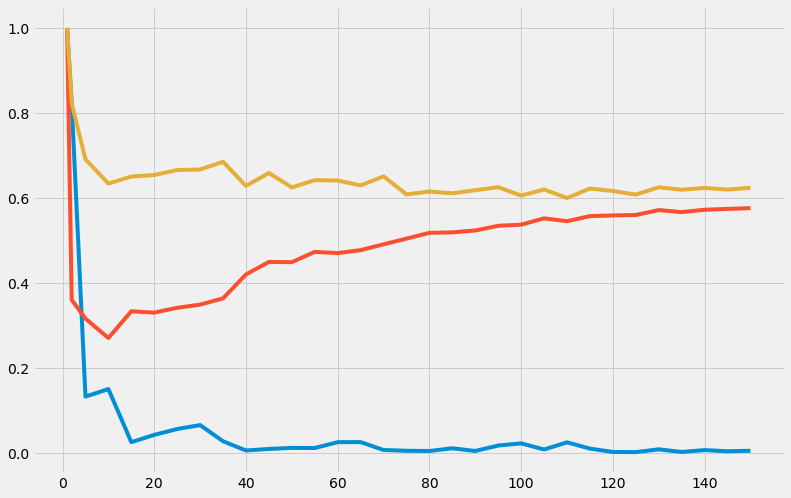

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_acc)
ax.plot(x, y_nmi)
ax.plot(x, y_purity)
# ax.plot(x, y_agreement)